In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-22-complete-player-dataset/female_players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_20.csv
/kaggle/input/fifa-22-complete-player-dataset/players_15.csv
/kaggle/input/fifa-22-complete-player-dataset/players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/Career Mode female player datasets - FIFA 16-22.xlsx
/kaggle/input/fifa-22-complete-player-dataset/players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_21.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_21.cs

<center><img
src="https://sportsblogtipster.com/wp-content/uploads/2019/04/Untitled-design-720x200.png" style="width:100%;height:100%;">
</center>

<center><img
src="https://w0.peakpx.com/wallpaper/914/93/HD-wallpaper-mbappe-sport-futbol-psg-soccer-kylian-mbappe-fifa-22.jpg" style="width:100%;height:100%;">
</center>

# Introduction:
## Hey everyone! Welcome to my FIFA dataset analysis! 

## FIFA is one of the most popular soccer video games released by EA Sports. This dataset contains information of players present in the game.

## I initiated this project by first importing the libraries, understanding the data and taking care of the missing values. 

## Then, I performed analysis through which I was able to draw insights about players, clubs etc.

References:
* https://www.kaggle.com/mrisdal/starter-fifa-19-complete-player-54855b15-c
* https://www.kaggle.com/ivanbay/fifa21-top-100-players-analysis#4.-Goalkeepers-analysis
* https://www.kaggle.com/stefanoleone992/fifa-22-players-lineup-visualization-and-more




# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
from collections import defaultdict
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
from matplotlib.font_manager import FontProperties
from functools import reduce
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

# Reading and Understanding the Data 

In [3]:
players_df = pd.read_csv('/kaggle/input/fifa-22-complete-player-dataset/players_21.csv')
players_df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,1987-06-24,170,72,241.0,FC Barcelona,Spain Primera Division,1.0,CAM,10.0,NaN,2004-07-01,2021.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Speed Drib...",85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,1985-02-05,187,83,45.0,Juventus,Italian Serie A,1.0,LS,7.0,NaN,2018-07-10,2022.0,38,Portugal,1354.0,LS,7.0,Right,4,5,5,High/Low,Unique,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,NaN,91+1,91+1,91+1,89,91,91,91,89,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,1988-08-21,184,80,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,NaN,NaN,NaN,Right,4,4,4,High/Medium,Unique,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19,15,6,12,8,10,NaN,89+2,89+2,89+2,85,87,87,87,85,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar 

value_eur                      237
wage_eur                       225
club_team_id                   225
club_name                      225
league_name                    225
league_level                   225
club_position                  225
club_jersey_number             225
club_loaned_from             18186
club_joined                    983
club_contract_valid_until      225
nation_team_id               17817
nation_position              17817
nation_jersey_number         17817
release_clause_eur             995
player_tags                  17536
player_traits                10629
pace                          2083
shooting                      2083
passing                       2083
dribbling                     2083
defending                     2083
physic                        2083
goalkeeping_speed            16861
club_logo_url                  225
club_flag_url                  225
nation_logo_url              17817


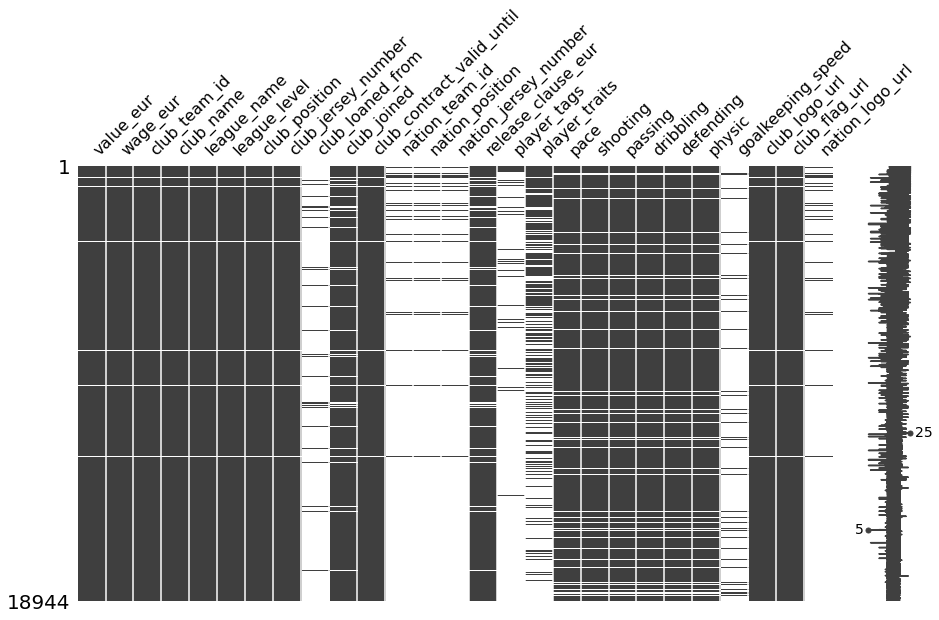

In [4]:
null_values_series = players_df.isnull().sum().where(lambda x : x > 0).dropna().astype('Int32')
print(null_values_series.to_string()) # to_string() removes the name and dtype from the output
msno.matrix(players_df[null_values_series.index.tolist()], figsize=(15, 8));

In [5]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.9+ MB


In [6]:
total_entries = 18944*110
(players_df.isnull().sum().sum()/total_entries)*100

7.267496544840295

Around 7% of the data is missing

Column Names:

In [7]:
players_df.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'moveme

In [8]:
Del_columns = ['sofifa_id','dob','long_name','player_url','long_name',
               'body_type','real_face','nation_position','club_loaned_from',
               'nation_jersey_number','release_clause_eur','player_tags',
               'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf','rw', 'lam', 'cam'
               , 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb','ldm', 'cdm',
               'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [9]:
# Current number of columns
len(players_df.columns.values)

110

In [10]:
# Dropping the unnecessary columns
players_df.drop(columns=Del_columns,inplace=True)

In [11]:
# New number of columns
len(players_df.columns.values)

73

### Lets reduce the analysis to the Top 100 players of the game

In [12]:
players_df = players_df[:100]

### First 5 players in the Top 100 list:

In [13]:
players_df.head()

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,L. Messi,"RW, ST, CF",93,93,103500000.0,560000.0,33,170,72,241.0,FC Barcelona,Spain Primera Division,1.0,CAM,10.0,2004-07-01,2021.0,52,Argentina,1369.0,Left,4,4,5,Medium/Low,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,NaN,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,Cristiano Ronaldo,"ST, LW",92,92,63000000.0,220000.0,35,187,83,45.0,Juventus,Italian Serie A,1.0,LS,7.0,2018-07-10,2022.0,38,Portugal,1354.0,Right,4,5,5,High/Low,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,NaN,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,R. Lewandowski,ST,91,91,111000000.0,240000.0,31,184,80,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,2014-07-01,2023.0,37,Poland,NaN,Right,4,4,4,High/Medium,"Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19,15,6,12,8,10,NaN,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,Neymar Jr,"LW, CAM",91,91,132000000.0,270000.0,28,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,2017-08-03,2022.0,54,Brazil,NaN,Right,5,5,5,High/Medium,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,35,30,29,9,9,15,15,11,NaN,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,K. De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,2015-08-30,2023.0,7,Belgium,1325.0,Right,5,4,4,High/High,"Injury Prone, Leadership, Early Crosser, Long ...",76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,68,65,53,15,13,5,10,13,NaN,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


### Last 5 players in the Top 100 list:

In [14]:
players_df.tail()

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
95,Rodri,"CDM, CM",85,88,66500000.0,145000.0,24,191,82,10.0,Manchester City,English Premier League,1.0,CDM,16.0,2019-07-04,2024.0,45,Spain,1362.0,Right,4,3,2,Medium/High,NaN,65.0,68.0,77.0,77.0,82.0,79.0,63,64,75,85,59,76,65,54,82,82,66,65,68,82,69,74,69,84,79,76,76,83,75,82,46,85,83,84,78,10,10,7,14,8,NaN,18+2,https://cdn.sofifa.net/players/231/866/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1362/60.png,https://cdn.sofifa.net/flags/es.png
96,M. Škriniar,CB,85,89,67000000.0,130000.0,25,188,80,44.0,Inter,Italian Serie A,1.0,LCB,37.0,2017-07-07,2023.0,43,Slovakia,NaN,Right,4,2,1,Medium/High,NaN,69.0,41.0,59.0,66.0,87.0,81.0,40,42,82,73,40,67,34,30,69,69,70,68,48,83,51,50,78,73,84,30,86,86,30,57,56,81,92,87,83,10,13,12,8,12,NaN,19+2,https://cdn.sofifa.net/players/232/363/21_120.png,https://cdn.sofifa.net/teams/44/60.png,https://cdn.sofifa.net/flags/it.png,NaN,https://cdn.sofifa.net/flags/sk.png
97,M. de Ligt,CB,85,92,99000000.0,81000.0,20,189,89,45.0,Juventus,Italian Serie A,1.0,SUB,4.0,2019-07-18,2024.0,34,Netherlands,105035.0,Right,4,2,3,Medium/High,"Solid Player, Power Header",72.0,59.0,66.0,69.0,85.0,84.0,52,50,86,75,45,66,48,55,74,76,68,75,56,84,60,82,84,76,88,66,83,83,44,63,40,82,86,85,82,12,11,11,12,10,NaN,19+3,https://cdn.sofifa.net/players/235/243/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
98,K. Havertz,"CAM, RM, CF",85,93,121000000.0,105000.0,21,188,83,5.0,Chelsea,English Premier League,1.0,RM,29.0,2020-09-04,2025.0,21,Germany,1337.0,Left,4,4,3,Medium/Medium,"Finesse Shot, Playmaker (AI), Outside Foot Sho...",84.0,81.0,79.0,85.0,45.0,67.0,73,85,78,84,80,86,84,53,78,87,78,88,78,85,74,74,75,82,69,78,42,38,84,82,73,84,39,46,38,6,8,11,10,12,NaN,17+3,https://cdn.sofifa.net/players/235/790/21_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
99,Fernandinho,"CB, CDM",84,84,11000000.0,110000.0,35,179,67,10.0,Manchester City,English Premier League,1.0,RCB,25.0,2013-07-01,2021.0,54,Brazil,NaN,Right,4,3,3,Medium/High,NaN,64.0,72.0,78.0,78.0,85.0,79.0,68,66,71,86,73,76,70,72,81,82,67,62,69,88,77,83,84,78,76,78,87,89,70,73,61,81,88,86,83,12,11,5,13,7,NaN,19+3,https://cdn.sofifa.net/players/135/507/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png


### Converting missing values

#### Missing Vales:

In [15]:
missing_data = players_df.isnull().sum()
print(missing_data[missing_data > 0])

nation_team_id       41
player_traits         6
pace                 15
shooting             15
passing              15
dribbling            15
defending            15
physic               15
goalkeeping_speed    85
nation_logo_url      41
dtype: int64


In [16]:
missing_values_list = ['pace','shooting','passing','dribbling','defending']
for x in missing_values_list:
        players_df[x].fillna(players_df[x].min(), inplace=True)

In [17]:
players_df['physic'].fillna(players_df['physic'].mean(), inplace=True)

In [18]:
players_df['player_traits'] = players_df['player_traits'].fillna('No traits available')
players_df.drop(columns='defending_marking_awareness',inplace=True)

In [19]:
missing_data = players_df.isnull().sum()
print(missing_data[missing_data > 0])

nation_team_id       41
goalkeeping_speed    85
nation_logo_url      41
dtype: int64


In [20]:
players_df.fillna(10,inplace=True)

#### Remaining null values after replacing with real values:

In [21]:
players_df.isnull().sum().sum() # no missing values left

0

# Starting the Analysis

## 1. Top 5 Players in the Game

In [22]:
top_players_df = players_df.sort_values(by = 'overall',ascending = False).head(10)
top_players_df.drop(players_df.columns.difference(['short_name','player_positions','overall']), 1, inplace=True)
top_players_df.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,short_name,player_positions,overall
0,L. Messi,"RW, ST, CF",93
1,Cristiano Ronaldo,"ST, LW",92
2,R. Lewandowski,ST,91
3,Neymar Jr,"LW, CAM",91
4,K. De Bruyne,"CAM, CM",91


As usual, L. Messi is the best player in the game 😝

## 2. Number of players from each country

In [23]:
country_df = players_df.sort_values(by = 'overall',ascending = False).head(100)
country_df.drop(country_df.columns.difference(['short_name','nationality_name']), 1, inplace=True)
print(country_df)

           short_name nationality_name
0            L. Messi        Argentina
1   Cristiano Ronaldo         Portugal
2      R. Lewandowski           Poland
3           Neymar Jr           Brazil
4        K. De Bruyne          Belgium
..                ...              ...
74         C. Eriksen          Denmark
75        Alex Sandro           Brazil
76          R. Lukaku          Belgium
77            B. Leno          Germany
99        Fernandinho           Brazil

[100 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



#### Number of players per country:

In [24]:
country_df['nationality_name'].value_counts()

Germany                   12
Spain                     12
Brazil                    10
France                     9
England                    8
Italy                      6
Argentina                  6
Belgium                    6
Netherlands                5
Portugal                   4
Senegal                    2
Slovenia                   2
Poland                     2
Uruguay                    2
Bosnia and Herzegovina     1
Algeria                    1
Hungary                    1
Slovakia                   1
Serbia                     1
Morocco                    1
Korea Republic             1
Switzerland                1
Gabon                      1
Croatia                    1
Costa Rica                 1
Scotland                   1
Egypt                      1
Denmark                    1
Name: nationality_name, dtype: int64

## 3. Top 10 Countries with respect to number of players

In [25]:
country_df['nationality_name'].value_counts()[0:10]

Germany        12
Spain          12
Brazil         10
France          9
England         8
Italy           6
Argentina       6
Belgium         6
Netherlands     5
Portugal        4
Name: nationality_name, dtype: int64

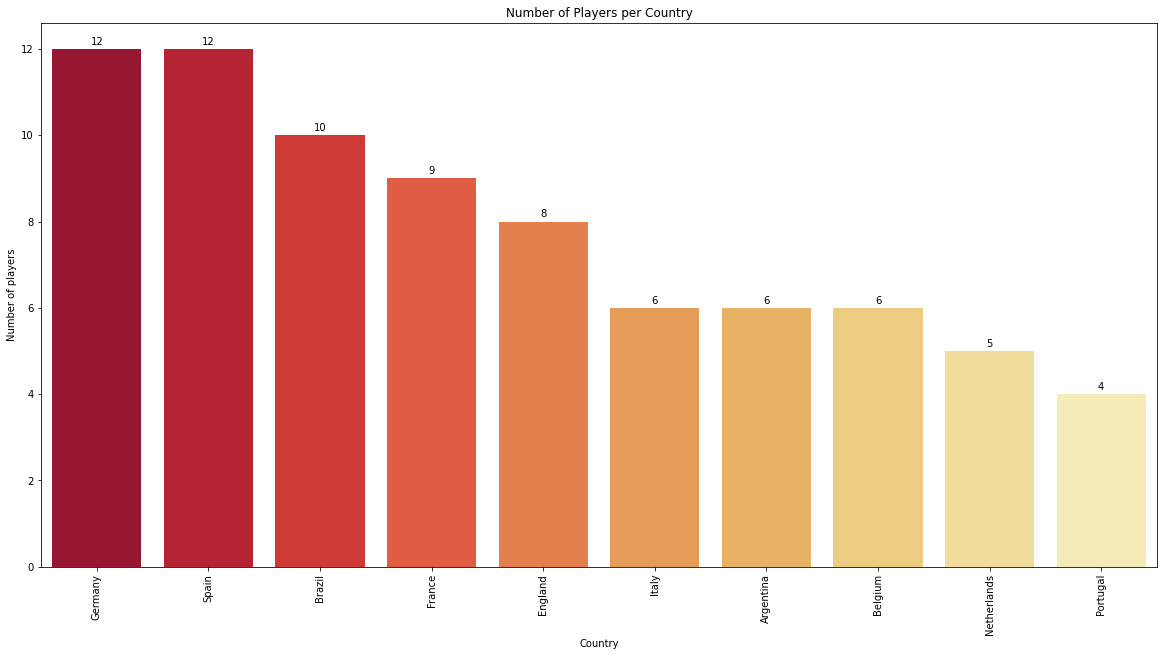

In [26]:
fig, ax1 = plt.subplots(figsize=(20,10))

graph = sns.countplot(ax=ax1, data=country_df, x='nationality_name', order=country_df['nationality_name'].value_counts().head(10).index, palette='YlOrRd_r' )

ax1.set(xlabel='Country',ylabel='Number of players',title='Number of Players per Country',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")
    
plt.show()

## 4. Value of Players

#### Top 10 Highest Valued Players

In [27]:
value_df = players_df.sort_values(by = 'value_eur',ascending = False).head(10)
value_df.drop(players_df.columns.difference(['short_name','overall','value_eur']), 1, inplace=True)
value_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,short_name,overall,value_eur
11,K. Mbappé,90,185500000.0
3,Neymar Jr,91,132000000.0
4,K. De Bruyne,91,129000000.0
47,J. Sancho,87,124000000.0
98,K. Havertz,85,121000000.0
8,S. Mané,90,120500000.0
9,M. Salah,90,120500000.0
5,J. Oblak,91,120000000.0
23,R. Sterling,88,114500000.0
46,T. Alexander-Arnold,87,114000000.0


* We can see that K. Mbappe is the most valuable player who is worth €185500000. 
* Lets plot this data to visualize our understanding

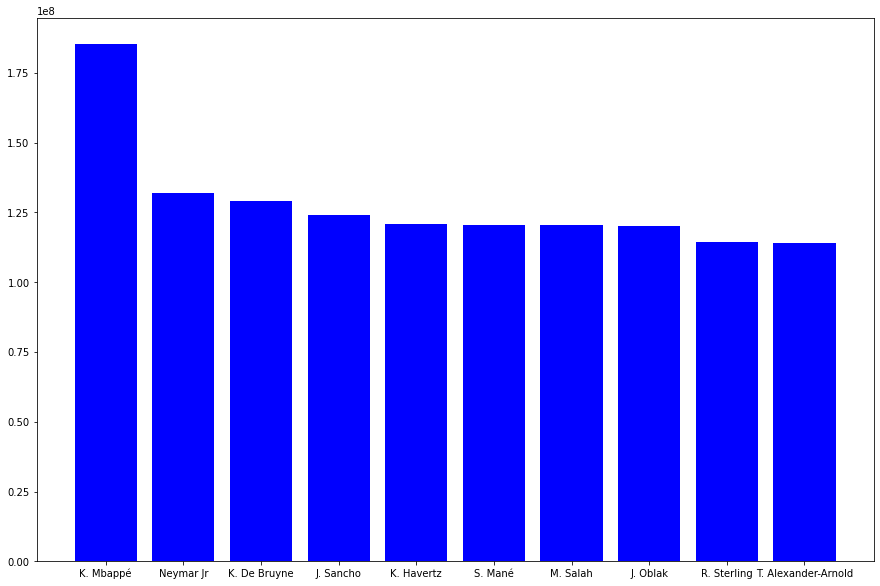

In [28]:
plt.figure(figsize=(15,10))
plt.bar(list(value_df['short_name'])[0:10],list(value_df['value_eur'])[0:10],color="b")
plt.show()

Similarly, lets find out the highest-earners among the list of players

## 5. Highest Paid Player

#### Top 10 Highest Paid Players:

In [29]:
wage_df = players_df.sort_values(by = 'wage_eur',ascending = False).head(10)
wage_df.drop(players_df.columns.difference(['short_name','overall','wage_eur']), 1, inplace=True)
wage_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,short_name,overall,wage_eur
0,L. Messi,93,560000.0
4,K. De Bruyne,91,370000.0
14,K. Benzema,89,350000.0
20,E. Hazard,88,350000.0
19,T. Kroos,88,310000.0
17,Casemiro,89,310000.0
13,Sergio Ramos,89,300000.0
12,S. Agüero,89,300000.0
38,A. Griezmann,87,290000.0
30,L. Suárez,87,280000.0


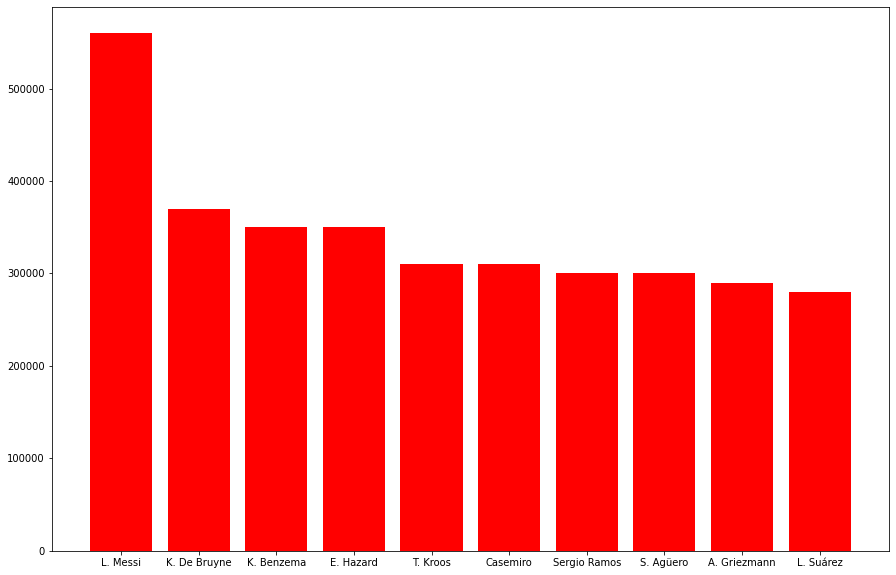

In [30]:
plt.figure(figsize=(15,10))
plt.bar(list(wage_df['short_name'])[0:10],list(wage_df['wage_eur'])[0:10],color="r")
plt.show()

* From here we can assume that the highest paid player is L. Messi.
* We can also see that there is a huge gap between the wages of the highest paid player and the rest of the players.
* But from the looks of things, we can also say that the players aren't paid according to their "Overall" rating or "Value" of the players. If it were so, then Cristiano Ronaldo would've been the second highest paid player after L. Messi.


By looking at the plot above, we can also see that majority of the highest paid players play for Real Madrid. Lets see if this is true.

## 6. Analysing the Best Teams according to Player Overall

### 6.1 List of players and their teams

In [31]:
teams_df = players_df.sort_values(by = 'overall',ascending = False).head(100)
teams_df.drop(teams_df.columns.difference(['short_name','club_name']), 1, inplace=True)
teams_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,short_name,club_name
0,L. Messi,FC Barcelona
1,Cristiano Ronaldo,Juventus
2,R. Lewandowski,FC Bayern München
3,Neymar Jr,Paris Saint-Germain
4,K. De Bruyne,Manchester City
...,...,...
74,C. Eriksen,Inter
75,Alex Sandro,Juventus
76,R. Lukaku,Inter
77,B. Leno,Arsenal


#### Player count per team (Top 100 players only)

In [32]:
teams_df['club_name'].value_counts()

Liverpool                   11
FC Barcelona                10
Manchester City             10
Real Madrid CF               9
Juventus                     7
Paris Saint-Germain          7
FC Bayern München            6
Chelsea                      5
Inter                        5
Tottenham Hotspur            4
Manchester United            4
Lazio                        3
Borussia Dortmund            3
Napoli                       3
Atlético de Madrid           2
Arsenal                      2
Leicester City               2
Real Sociedad                1
Borussia Mönchengladbach     1
Atalanta                     1
AC Milan                     1
Olympique Lyonnais           1
RB Leipzig                   1
Villarreal CF                1
Name: club_name, dtype: int64

#### Top 10 Teams 

In [33]:
teams_df['club_name'].value_counts()[0:10]

Liverpool              11
FC Barcelona           10
Manchester City        10
Real Madrid CF          9
Juventus                7
Paris Saint-Germain     7
FC Bayern München       6
Chelsea                 5
Inter                   5
Tottenham Hotspur       4
Name: club_name, dtype: int64

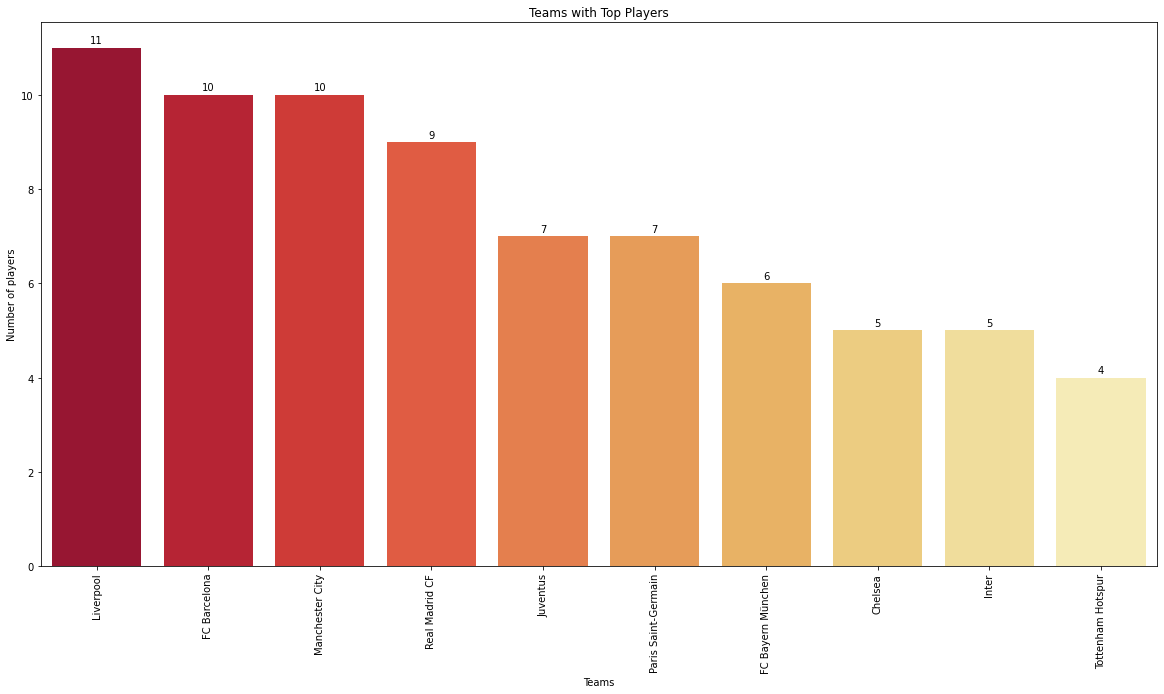

In [34]:
fig, ax1 = plt.subplots(figsize=(20,10))

graph = sns.countplot(ax=ax1, data=teams_df, x='club_name', order=teams_df['club_name'].value_counts().head(10).index, palette='YlOrRd_r' )

ax1.set(xlabel='Teams',ylabel='Number of players',title='Teams with Top Players',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")
    
plt.show()


The best team according to this data is Liverpool and the next best team is FC Barcelona

Lets find out the list of players from both teams

### 6.2 The Top 2 Clubs
* Here we are going to analyse the players of the Top 2 clubs and which team has better players in terms of Overall ratings.
* To do that, we are going to have to make a list of players that plays for FC Barcelona and Liverpool that exist in the Top 100 list.
* Then, we are going to make two seprate tables, one with the Barça players and one with The Reds.
* After making the lists, we are going to find the sum of the overall of players to figure out which team has better players.

In [35]:
top_team_players_df = players_df[players_df.club_name.isin(["FC Barcelona", "Liverpool"])]
top_team_players_df.drop(top_team_players_df.columns.difference(['short_name','club_name','overall']), 1, inplace=True)
top_team_players_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,short_name,overall,club_name
0,L. Messi,93,FC Barcelona
6,M. ter Stegen,90,FC Barcelona
7,V. van Dijk,90,Liverpool
8,S. Mané,90,Liverpool
9,M. Salah,90,Liverpool
10,Alisson,90,Liverpool
30,L. Suárez,87,FC Barcelona
35,Sergio Busquets,87,FC Barcelona
38,A. Griezmann,87,FC Barcelona
40,Roberto Firmino,87,Liverpool


#### Barcelona Players in the Top 10:

In [36]:
barcelona_df = players_df[players_df.club_name.isin(["FC Barcelona"])]
barcelona_df.drop(barcelona_df.columns.difference(['short_name','club_name','overall']), 1, inplace=True)
liverpool_df = players_df[players_df.club_name.isin(["Liverpool"])]
liverpool_df.drop(liverpool_df.columns.difference(['short_name','club_name','overall']), 1, inplace=True)
barcelona_df


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,short_name,overall,club_name
0,L. Messi,93,FC Barcelona
6,M. ter Stegen,90,FC Barcelona
30,L. Suárez,87,FC Barcelona
35,Sergio Busquets,87,FC Barcelona
38,A. Griezmann,87,FC Barcelona
49,Piqué,86,FC Barcelona
54,Jordi Alba,86,FC Barcelona
64,M. Pjanić,85,FC Barcelona
89,C. Lenglet,85,FC Barcelona
92,F. de Jong,85,FC Barcelona


#### Liverpool Players in the Top 10:

In [37]:
liverpool_df

,short_name,overall,club_name
7,V. van Dijk,90,Liverpool
8,S. Mané,90,Liverpool
9,M. Salah,90,Liverpool
10,Alisson,90,Liverpool
40,Roberto Firmino,87,Liverpool
41,Fabinho,87,Liverpool
44,A. Robertson,87,Liverpool
46,T. Alexander-Arnold,87,Liverpool
53,J. Henderson,86,Liverpool
65,G. Wijnaldum,85,Liverpool


Lets find the sum of the player's overall of FC Barcelona and Liverpool

#### Sum of the overall rating of Barça players:

In [38]:
barcelona_sum = barcelona_df["overall"].sum()
barcelona_sum

871

#### Sum of the overall rating of Liverpool players: 

In [39]:
liverpool_sum = barcelona_df["overall"].sum()
liverpool_sum

871

* We can see that the sum of the overall of players of both clubs add upto 871.
* But from the previous analysis we have also seen that the number of players from FC Barcelona in the Top 100 list is also one lesser that Liverpool.
* From here we can conclude that with respect to Overall ratings, FC Barcelona has better players when compared to Liverpool.

## 7. The GOAT Debate

#### L. Messi Attributes

In [40]:
messi_df = players_df[players_df.short_name.isin(["L. Messi"])]
messi_df.drop(messi_df.columns.difference(['short_name','overall', 'pace','shooting', 'passing', 'dribbling', 'defending', 
'physic','attacking_crossing', 'attacking_finishing','attacking_heading_accuracy', 
'attacking_short_passing','attacking_volleys', 'skill_dribbling', 'skill_curve',
'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
'movement_acceleration', 'movement_sprint_speed','movement_agility', 
'movement_reactions', 'movement_balance','power_shot_power', 'power_jumping', 
'power_stamina','power_strength', 'power_long_shots', 'mentality_aggression',
'mentality_interceptions', 'mentality_positioning','mentality_vision', 
'mentality_penalties', 'mentality_composure','defending_marking_awareness', 
'defending_standing_tackle','defending_sliding_tackle']), 1, inplace=True)
messi_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,short_name,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,93,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24


#### Cristiano Ronaldo Attributes

In [41]:
cr7_df = players_df[players_df.short_name.isin(["Cristiano Ronaldo"])]
cr7_df.drop(cr7_df.columns.difference(['short_name','overall', 'pace','shooting', 'passing', 'dribbling', 'defending', 
'physic','attacking_crossing', 'attacking_finishing','attacking_heading_accuracy', 
'attacking_short_passing','attacking_volleys', 'skill_dribbling', 'skill_curve',
'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
'movement_acceleration', 'movement_sprint_speed','movement_agility', 
'movement_reactions', 'movement_balance','power_shot_power', 'power_jumping', 
'power_stamina','power_strength', 'power_long_shots', 'mentality_aggression',
'mentality_interceptions', 'mentality_positioning','mentality_vision', 
'mentality_penalties', 'mentality_composure','defending_marking_awareness', 
'defending_standing_tackle','defending_sliding_tackle']), 1, inplace=True)
cr7_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,short_name,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
1,Cristiano Ronaldo,92,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24


#### Visualizing Ronaldo's and Messi's Attributes through a Bargraph

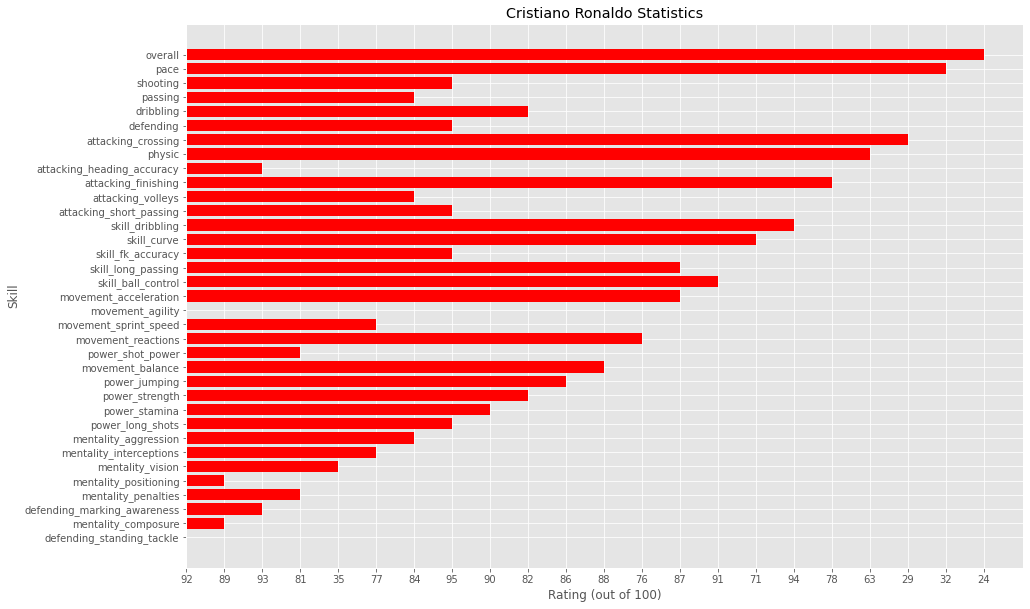

In [42]:
import matplotlib.pyplot as plt

y_axis = ['defending_standing_tackle','mentality_composure','defending_marking_awareness', 'mentality_penalties', 'mentality_positioning','mentality_vision', 'mentality_interceptions', 'mentality_aggression', 'power_long_shots', 'power_stamina','power_strength', 'power_jumping', 'movement_balance','power_shot_power', 'movement_reactions', 'movement_sprint_speed','movement_agility', 'movement_acceleration', 'skill_ball_control', 'skill_long_passing', 'skill_fk_accuracy', 'skill_curve', 'skill_dribbling', 'attacking_short_passing','attacking_volleys', 'attacking_finishing','attacking_heading_accuracy', 'physic','attacking_crossing', 'defending', 'dribbling', 'passing', 'shooting','pace', 'overall',]
x_axis = ['92','89','93','81','89','35','77','84','95','90','82','86','88','81','76','77','92','87','91','87','95','71','94','95','84','78','93','63','29','95','82','84','95','32','24']

plt.style.use('ggplot')

plt.figure(figsize=(15,10))
plt.barh(y_axis,x_axis,align='center', height=0.8, color="red")
plt.title('Cristiano Ronaldo Statistics')
plt.ylabel('Skill')
plt.xlabel('Rating (out of 100)')
plt.show()

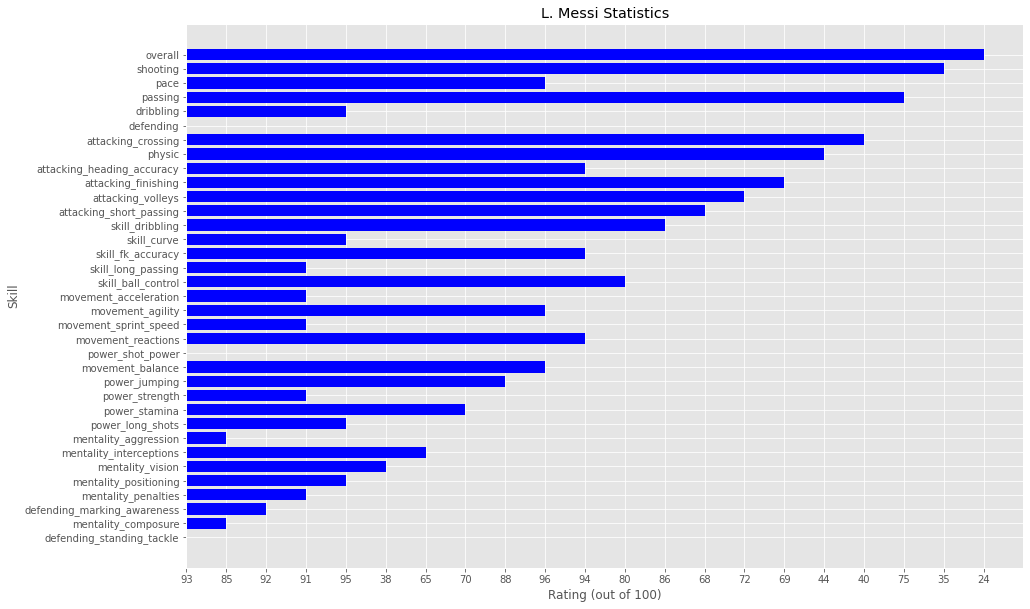

In [43]:
import matplotlib.pyplot as plt

y_axis = ['defending_standing_tackle','mentality_composure','defending_marking_awareness', 'mentality_penalties', 'mentality_positioning','mentality_vision', 'mentality_interceptions', 'mentality_aggression', 'power_long_shots', 'power_stamina','power_strength', 'power_jumping', 'movement_balance','power_shot_power', 'movement_reactions', 'movement_sprint_speed','movement_agility', 'movement_acceleration', 'skill_ball_control', 'skill_long_passing', 'skill_fk_accuracy', 'skill_curve', 'skill_dribbling', 'attacking_short_passing','attacking_volleys', 'attacking_finishing','attacking_heading_accuracy', 'physic','attacking_crossing', 'defending', 'dribbling', 'passing', 'pace','shooting', 'overall',]
x_axis = ['93','85','92','91','95','38','65','85','95','70','91','88','96','93','94','91','96','91','80','91','94','95','86','68','72','69','94','44','40','93','95','75','96','35','24']

plt.style.use('ggplot')

plt.figure(figsize=(15,10))
plt.barh(y_axis,x_axis,align='center', height=0.8, color="blue")
plt.title('L. Messi Statistics')
plt.ylabel('Skill')
plt.xlabel('Rating (out of 100)')
plt.show()

## 9. Correlation and Scatter Matrix

In [44]:
# Correlation matrix
def plotCorrelationMatrix(players_df, graphWidth):
    filename = players_df.dataframeName
    players_df = players_df.dropna('columns') # drop columns with NaN
    players_df = players_df[[col for col in players_df if players_df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if players_df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({players_df.shape[1]}) is less than 2')
        return
    corr = players_df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [45]:
# Scatter and density plots
def plotScatterMatrix(players_df, plotSize, textSize):
    players_df = players_df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    players_df = players_df.dropna('columns')
    players_df = players_df[[col for col in players_df if players_df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(players_df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    players_df = players_df[columnNames]
    ax = pd.plotting.scatter_matrix(players_df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = players_df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [46]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# data.csv has 18207 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/fifa-22-complete-player-dataset/players_21.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'players_21.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 110 columns


In [47]:
df1.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,1987-06-24,170,72,241.0,FC Barcelona,Spain Primera Division,1.0,CAM,10.0,NaN,2004-07-01,2021.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Speed Drib...",85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,1985-02-05,187,83,45.0,Juventus,Italian Serie A,1.0,LS,7.0,NaN,2018-07-10,2022.0,38,Portugal,1354.0,LS,7.0,Right,4,5,5,High/Low,Unique,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,NaN,91+1,91+1,91+1,89,91,91,91,89,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,1988-08-21,184,80,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,NaN,NaN,NaN,Right,4,4,4,High/Medium,Unique,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19,15,6,12,8,10,NaN,89+2,89+2,89+2,85,87,87,87,85,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar 

### 9.1 Correlation Matrix

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



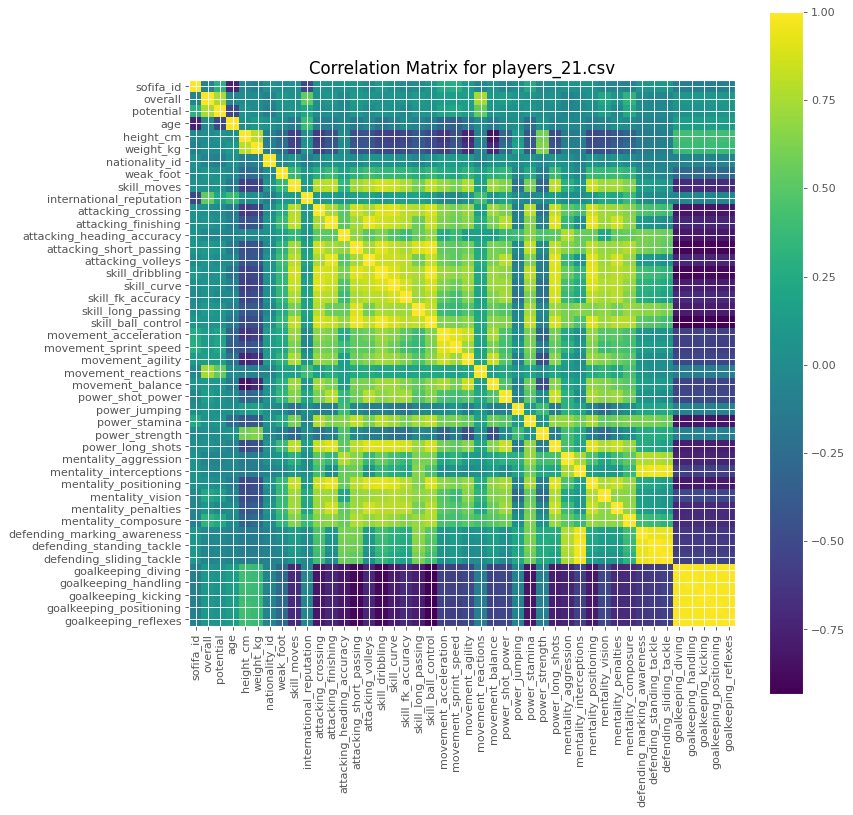

In [48]:
plotCorrelationMatrix(df1, 11)

### 9.2 Scatter and Density Plot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



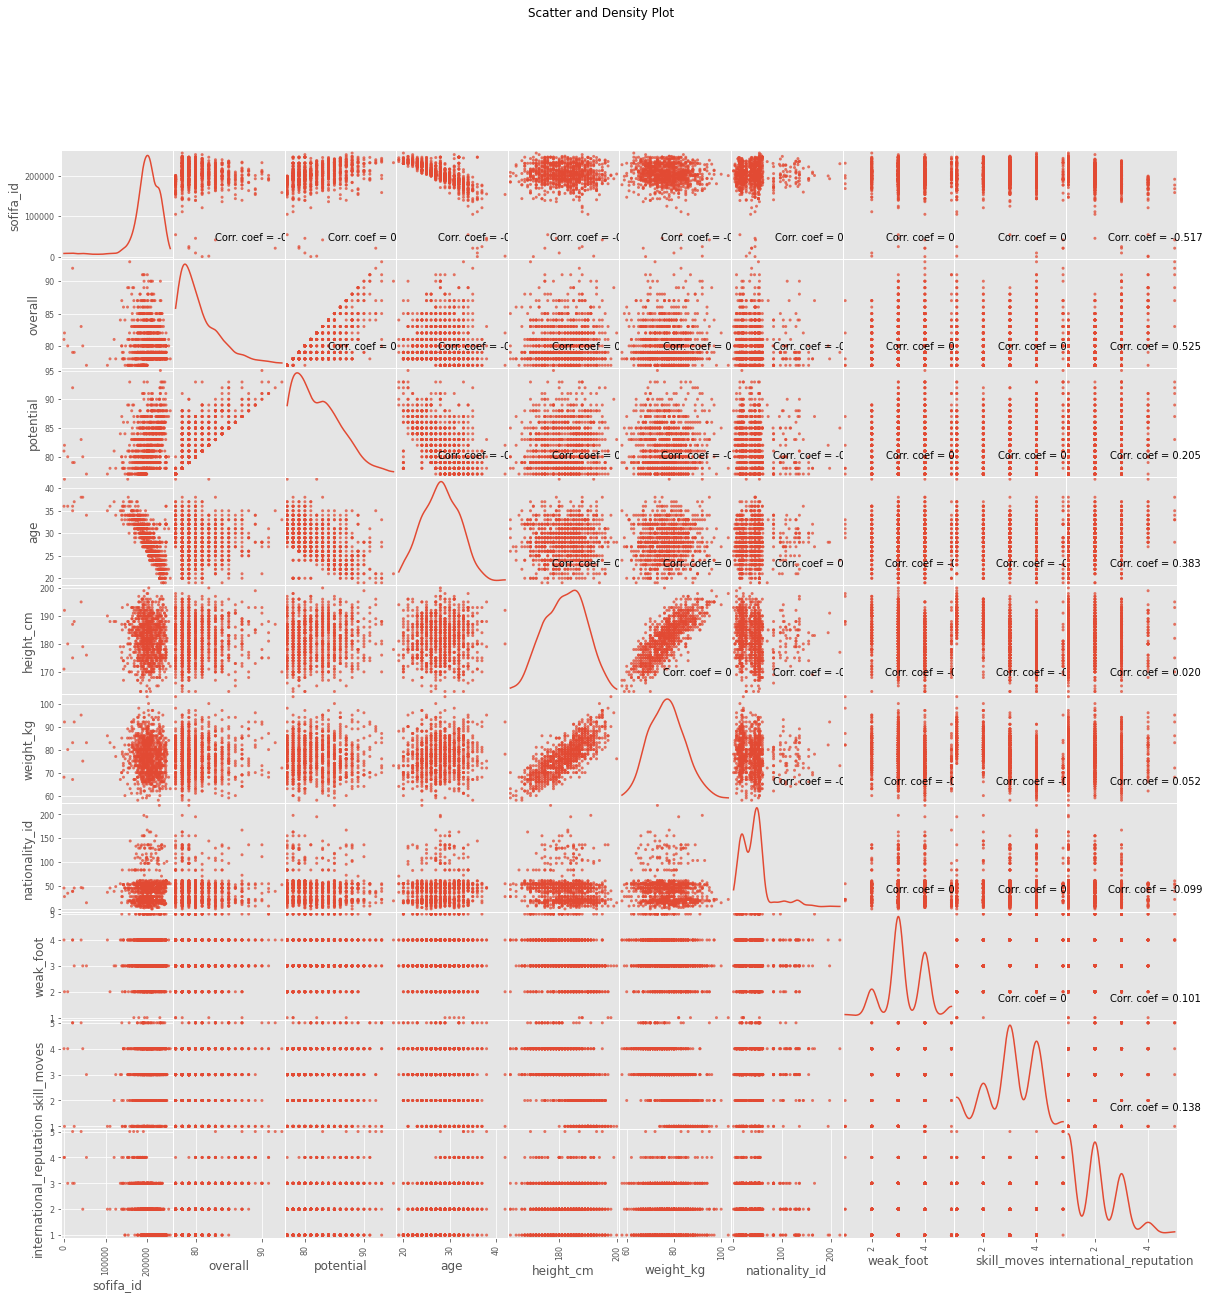

In [49]:
plotScatterMatrix(df1, 20, 10)

# Conclusion

This conludes the analysis, thanks for taking your time and going through this notebook. I am very happy with the analysis and the outputs. This was a great learning opportunity and I believe that there are much more analysis that can be done with this data. I enjoyed this analysis and will definitely perform more football related analysis!

# Thank You!!!

<center><img
src="https://media.giphy.com/media/xUA7aT4k7JLXH71zG0/giphy.gif" style="width:100%;height:100%;">
</center>